In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:04<00:00, 40.2MB/s]
100% 149M/149M [00:04<00:00, 34.0MB/s]


# Exploratory Data Analysis

## Remove Duplicates

In [3]:
import hashlib

PROJECT_DIR = "/content"
LABELS = ['glioma', 'meningioma', 'no_tumor', 'pituitary']


def compute_hash(filepath):
    """
    Generate a unique hash value for a given file using the MD5 hashing algorithm.
    Args:
        . filepath: path to a file.
    Returns:
        . hash of the file.
    """
    hasher = hashlib.md5()          # create an instance of the MD5 hash object
    with open(filepath, 'rb') as f: # open the file in binary mode
        buf = f.read()              # read the file contents into a buffer
        hasher.update(buf)          # compute the hash and store it in hasher
    return hasher.hexdigest()       # return hexadecimal representation of hasher


def list_files(hash_dict):
    for data_type in ['Training', 'Testing']:
        for label in LABELS:
            folder_path = os.path.join(PROJECT_DIR, data_type, label)
            for root, dirs, files in os.walk(folder_path):
                for file in files:
                    if file.endswith(".jpg"):
                        file_path = os.path.join(root, file)
                        file_hash = compute_hash(file_path)
                        if file_hash in hash_dict:
                            hash_dict[file_hash].append(file_path)
                        else:
                            hash_dict[file_hash] = [file_path]


def remove_duplicates(hash_dict):
    duplicate_count = 0
    for hash_value, file_paths in hash_dict.items():
        if len(file_paths) > 1:
            for file_path in file_paths[1:]:
                print(f"Removing duplicate (hash : {hash_value}) : {file_path}")
                os.remove(file_path)
                duplicate_count += 1
    print(f"Number of duplicates : {duplicate_count}")


if __name__ == '__main__':
    hash_dict = {}
    list_files(hash_dict)
    remove_duplicates(hash_dict)

Removing duplicate (hash : 3cb1d6594ea1a7391608e9bc8245529c) : /content/Testing/meningioma/Te-me_0143.jpg
Removing duplicate (hash : ab525628d00898aa6b1088d9c1d5a785) : /content/Training/meningioma/Tr-me_0175.jpg
Removing duplicate (hash : a501e6ea3748d3aebea8e8735268ec5b) : /content/Training/meningioma/Tr-me_0227.jpg
Removing duplicate (hash : af3a4cf5d54bd454b733bfe3d2177b4a) : /content/Training/meningioma/Tr-me_0176.jpg
Removing duplicate (hash : af3a4cf5d54bd454b733bfe3d2177b4a) : /content/Training/meningioma/Tr-me_0211.jpg
Removing duplicate (hash : 333ca271271562e025951545e76a8b0b) : /content/Training/meningioma/Tr-me_0249.jpg
Removing duplicate (hash : b0481c04cf82055b53bed325556f744e) : /content/Testing/meningioma/Te-me_0135.jpg
Removing duplicate (hash : 832c3e0243e8fafe4313d899e233285d) : /content/Training/meningioma/Tr-me_0617.jpg
Removing duplicate (hash : 9ac2bb858e51e57e9652feba3728004e) : /content/Training/pituitary/Tr-pi_0169.jpg
Removing duplicate (hash : 584ca4664acb9

In [4]:
def get_class_paths(path):
  """
  Map file path to the classification of the tumor in that image.
  Args:
    . path: path to a folder with subfolders entitled the classification of the images inside it.
  Returns:
    . Pandas dataframe with columns: file path, classification.
  """
  classes = []
  class_paths = []

  # Iterate through directories in the training path
  for label in os.listdir(path):
      label_path = os.path.join(path, label)

      # Check if it's a directory
      if os.path.isdir(label_path):
          # Iterate through images in the label directory
          for image in os.listdir(label_path):
              image_path = os.path.join(label_path, image)

              # Add class and path to respective lists
              classes.append(label)
              class_paths.append(image_path)

  # Create a DataFrame with the collected data
  df = pd.DataFrame({
      'Class Path': class_paths,
      'Class': classes
  })

  return df

In [5]:
tr_df = get_class_paths("/content/Training")

In [6]:
tr_df

,Class Path,Class
0,/content/Training/pituitary/Tr-pi_0140.jpg,pituitary
1,/content/Training/pituitary/Tr-pi_0514.jpg,pituitary
2,/content/Training/pituitary/Tr-pi_0311.jpg,pituitary
3,/content/Training/pituitary/Tr-pi_1174.jpg,pituitary
4,/content/Training/pituitary/Tr-pi_0594.jpg,pituitary
...,...,...
5689,/content/Training/glioma/Tr-gl_0436.jpg,glioma
5690,/content/Training/glioma/Tr-gl_0859.jpg,glioma
5691,/content/Training/glioma/Tr-gl_0753.jpg,glioma
5692,/content/Training/glioma/Tr-gl_0733.jpg,glioma


In [7]:
ts_df = get_class_paths("/content/Testing")

In [8]:
ts_df

,Class Path,Class
0,/content/Testing/pituitary/Te-pi_0064.jpg,pituitary
1,/content/Testing/pituitary/Te-pi_0132.jpg,pituitary
2,/content/Testing/pituitary/Te-pi_0059.jpg,pituitary
3,/content/Testing/pituitary/Te-pi_0099.jpg,pituitary
4,/content/Testing/pituitary/Te-pi_0040.jpg,pituitary
...,...,...
1296,/content/Testing/glioma/Te-gl_0169.jpg,glioma
1297,/content/Testing/glioma/Te-gl_0271.jpg,glioma
1298,/content/Testing/glioma/Te-gl_0206.jpg,glioma
1299,/content/Testing/glioma/Te-gl_0085.jpg,glioma


Text(0.5, 1.0, 'Training Data Class Distribution')

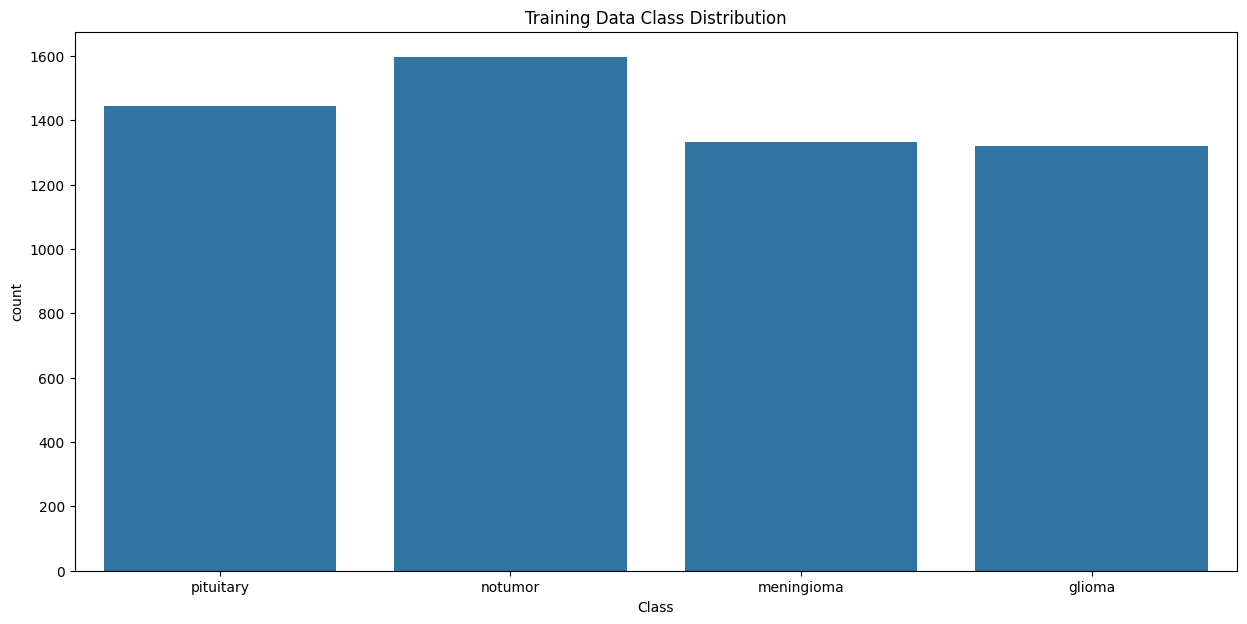

In [9]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df, x=tr_df['Class'])
plt.title("Training Data Class Distribution")

Text(0.5, 1.0, 'Testing Data Class Distribution')

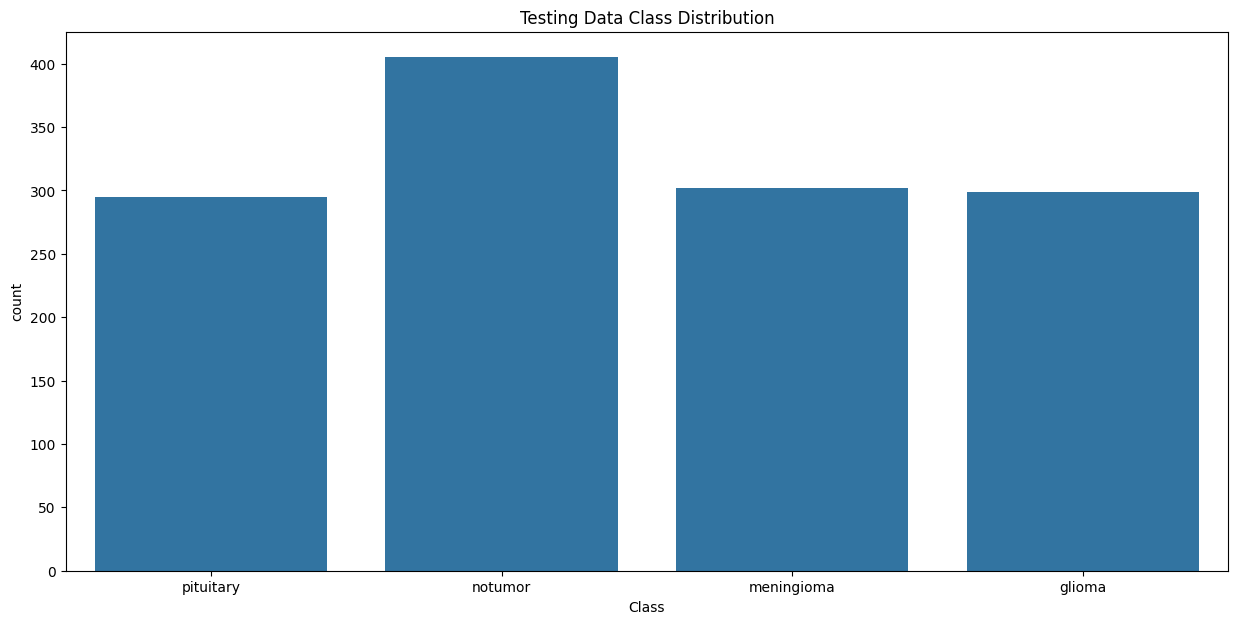

In [10]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df, x=ts_df['Class'])
plt.title("Testing Data Class Distribution")

# Data Preparation

## Train_Test Split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
# set aside data for validation
valid_df, ts_df = train_test_split(ts_df, train_size=0.5, stratify=ts_df['Class'])

In [13]:
valid_df

,Class Path,Class
773,/content/Testing/meningioma/Te-me_0075.jpg,meningioma
404,/content/Testing/notumor/Te-no_0284.jpg,notumor
665,/content/Testing/notumor/Te-no_0095.jpg,notumor
32,/content/Testing/pituitary/Te-pi_0027.jpg,pituitary
1290,/content/Testing/glioma/Te-gl_0178.jpg,glioma
...,...,...
820,/content/Testing/meningioma/Te-me_0302.jpg,meningioma
574,/content/Testing/notumor/Te-no_0057.jpg,notumor
1183,/content/Testing/glioma/Te-gl_0056.jpg,glioma
1048,/content/Testing/glioma/Te-glTr_0007.jpg,glioma


In [14]:
ts_df

,Class Path,Class
941,/content/Testing/meningioma/Te-me_0030.jpg,meningioma
882,/content/Testing/meningioma/Te-me_0136.jpg,meningioma
1041,/content/Testing/glioma/Te-gl_0118.jpg,glioma
1008,/content/Testing/glioma/Te-gl_0264.jpg,glioma
631,/content/Testing/notumor/Te-no_0397.jpg,notumor
...,...,...
904,/content/Testing/meningioma/Te-me_0079.jpg,meningioma
1263,/content/Testing/glioma/Te-gl_0124.jpg,glioma
829,/content/Testing/meningioma/Te-me_0255.jpg,meningioma
1025,/content/Testing/glioma/Te-gl_0128.jpg,glioma


## Data Preprocessing (Transformation)

In [15]:
# TODO: test with different values
batch_size = 32
## ensure inputs are consistent
image_size = (299, 299)
## standardize + adjust brightness
image_generator = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))
## for testing, only standardize. do not change production data!
ts_gen = ImageDataGenerator(rescale=1/255)

In [16]:
# Begin data pipeline
tr_gen = image_generator.flow_from_dataframe(tr_df,
                                           x_col='Class Path',
                                           y_col='Class',
                                           batch_size=batch_size,
                                           target_size=image_size)

valid_gen = image_generator.flow_from_dataframe(valid_df,
                                              x_col='Class Path',
                                              y_col='Class',
                                              batch_size=batch_size,
                                              target_size=image_size)

ts_gen = ts_gen.flow_from_dataframe(ts_df,
                                   x_col='Class Path',
                                   y_col='Class',
                                   batch_size=16,
                                   target_size=image_size,
                                   shuffle=False)

Found 5694 validated image filenames belonging to 4 classes.
Found 650 validated image filenames belonging to 4 classes.
Found 651 validated image filenames belonging to 4 classes.


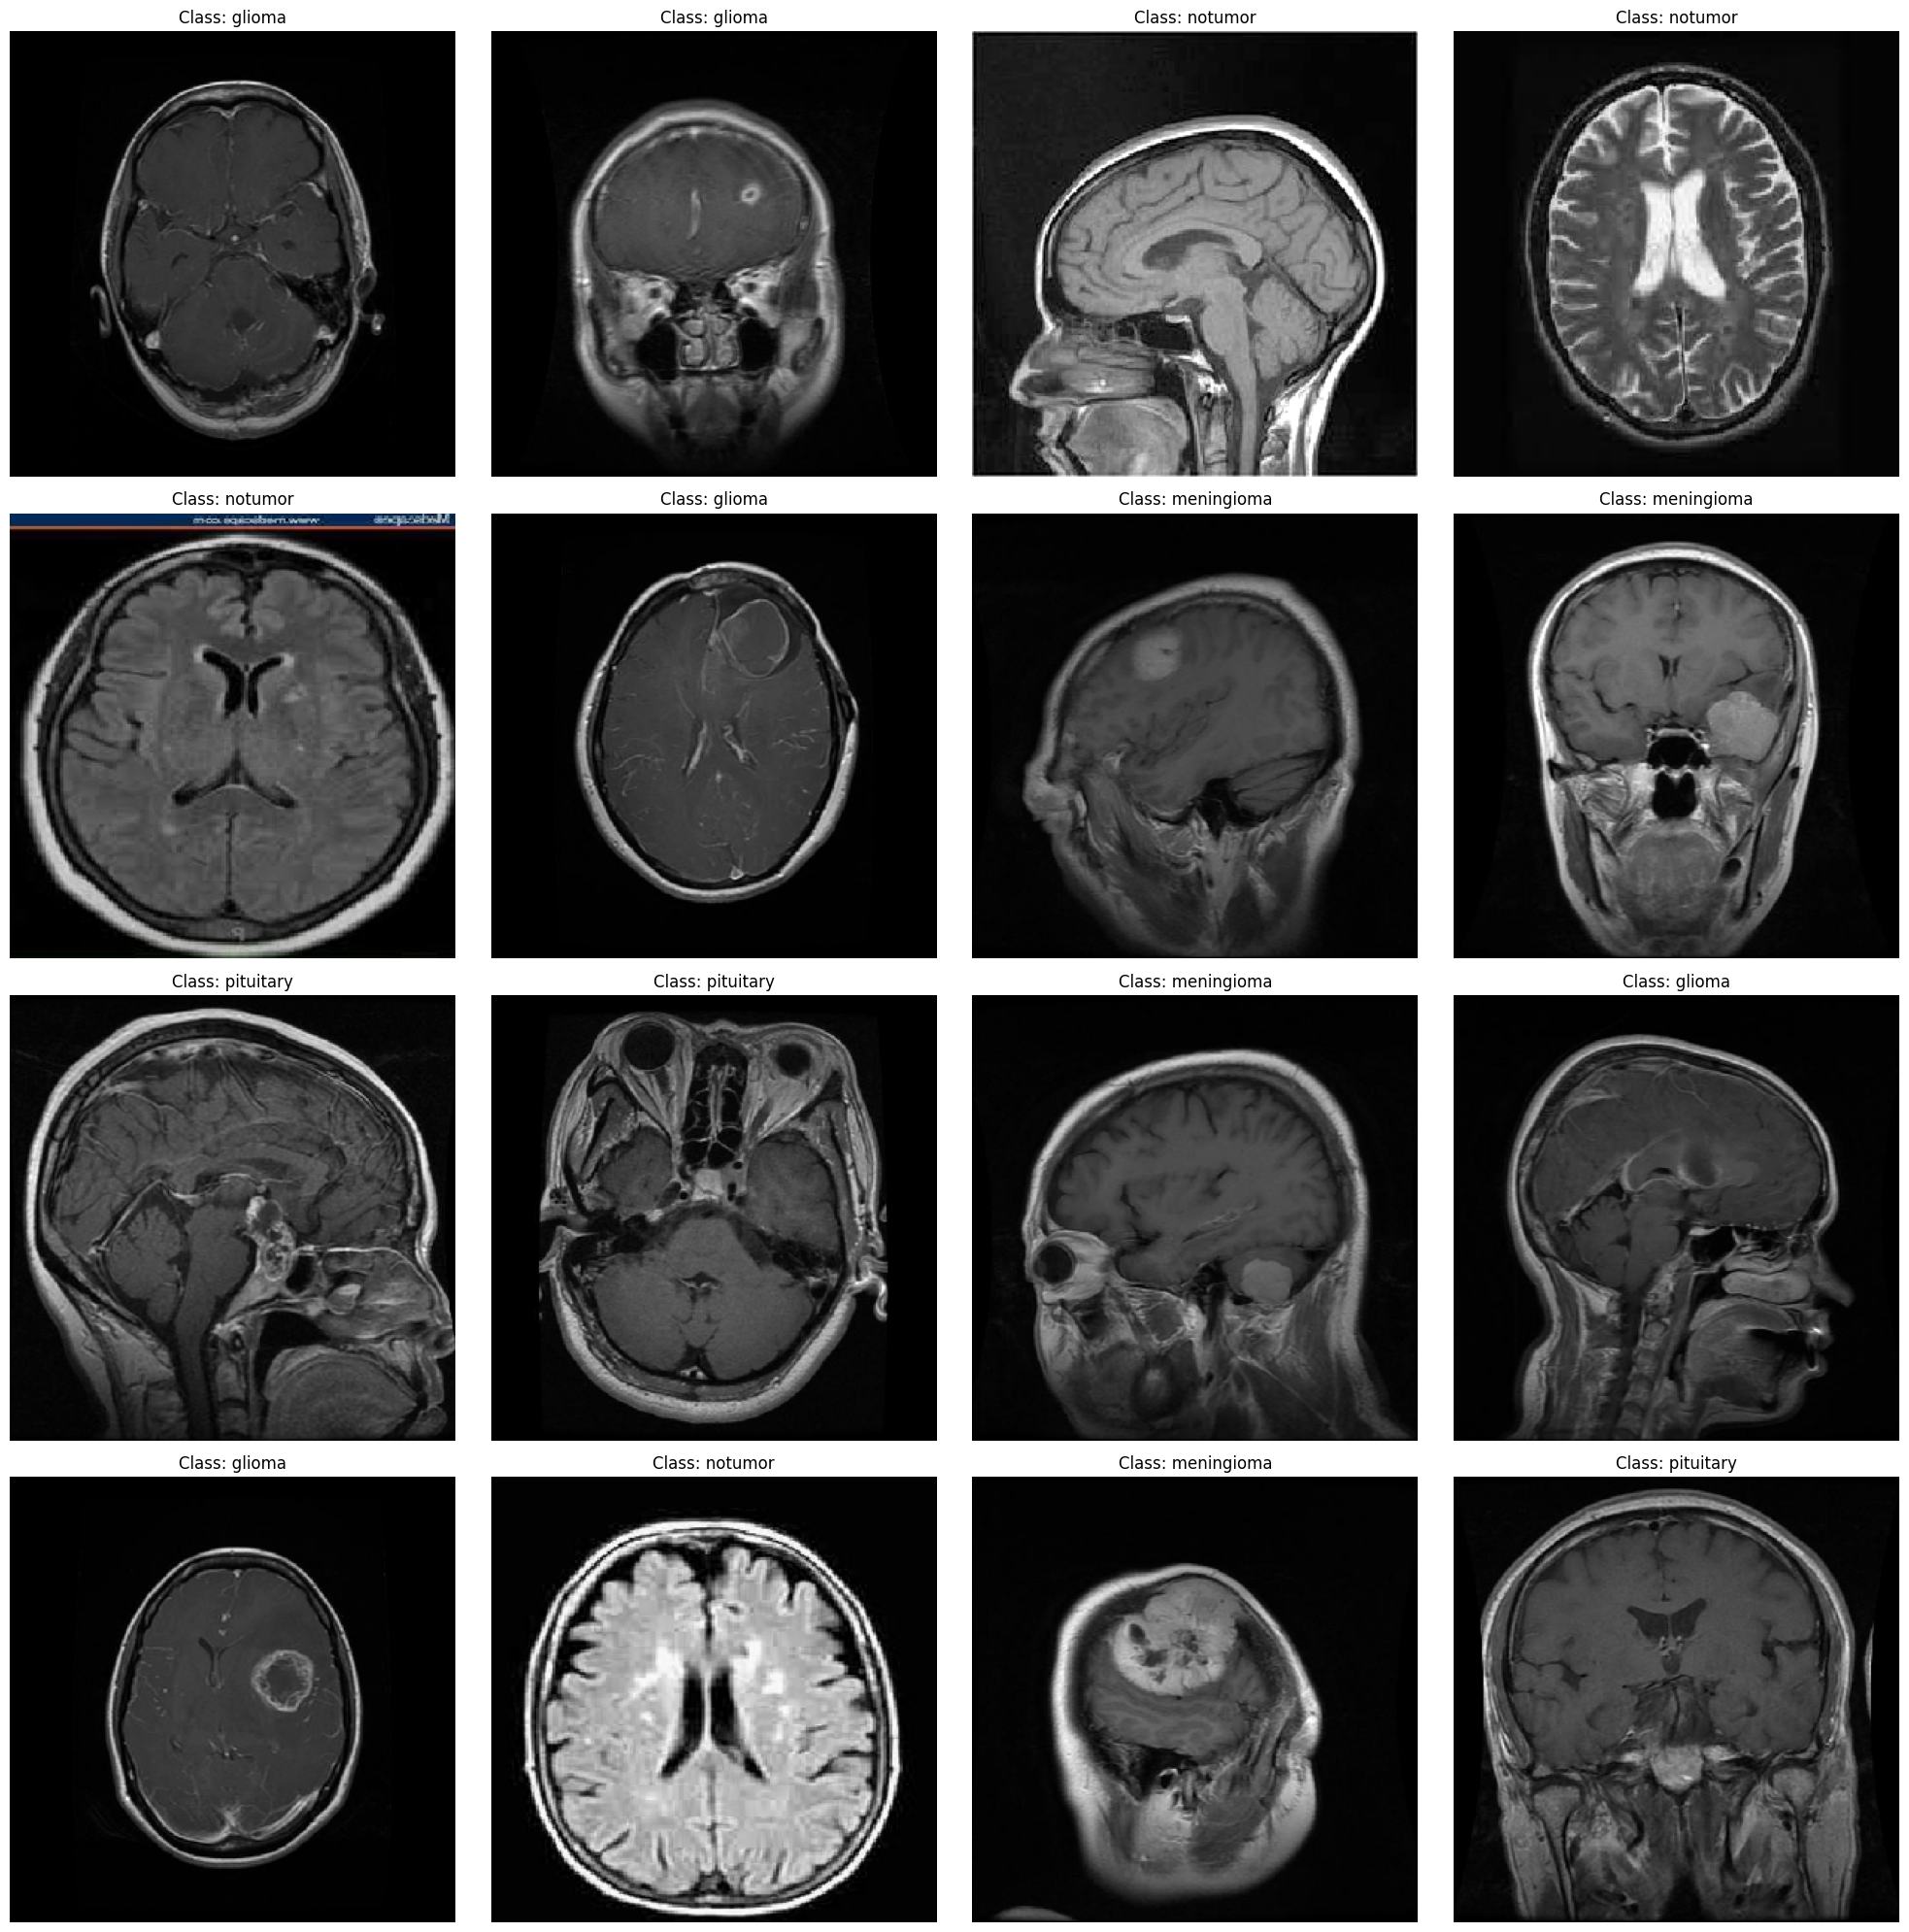

In [17]:
plt.figure(figsize=(20, 20))
for i in range(16):
    plt.subplot(4, 4, i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Transfer Learning (Xception Model)

## Model design

In [18]:
image_shape = (299, 299, 3)

base_model = tf.keras.applications.Xception(include_top=False, # use our own decision layers - "feature extraction"
                                            weights="imagenet",  # importing parameters
                                            input_shape=image_shape,
                                            pooling="max") # how to handle the output of the resulting layer (max is ideal for feature selection)

# Add layers on top of the base_model to create decision funnel
model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate=0.3),
    Dense(128, activation='relu'),
    Dropout(rate=0.25),
    Dense(4, activation='softmax')
])

model.compile(Adamax(learning_rate=0.001),
              loss="categorical_crossentropy", # the higher the loss, the worst the prediction --minimize the loss
              metrics=['accuracy', # % right predictions
                       Precision(), # % true positives
                       Recall()]) # % true positives corretly predicted

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Training

In [19]:
hist = model.fit(tr_gen, epochs=8, validation_data=valid_gen)

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 295s 1s/step - accuracy: 0.7489 - loss: 0.7139 - precision: 0.8360 - recall: 0.6456 - val_accuracy: 0.8431 - val_loss: 0.4250 - val_precision: 0.8748 - val_recall: 0.8169
Epoch 2/8
178/178 ━━━━━━━━━━━━━━━━━━━━ 149s 833ms/step - accuracy: 0.9767 - loss: 0.0687 - precision: 0.9778 - recall: 0.9763 - val_accuracy: 0.8985 - val_loss: 0.2715 - val_precision: 0.9051 - val_recall: 0.8954
Epoch 3/8
178/178 ━━━━━━━━━━━━━━━━━━━━ 150s 834ms/step - accuracy: 0.9918 - loss: 0.0300 - precision: 0.9918 - recall: 0.9900 - val_accuracy: 0.9831 - val_loss: 0.0743 - val_precision: 0.9831 - val_recall: 0.9831
Epoch 4/8
178/178 ━━━━━━━━━━━━━━━━━━━━ 149s 830ms/step - accuracy: 0.9930 - loss: 0.0239 - precision: 0.9933 - recall: 0.9928 - val_accuracy: 0.9754 - val_loss: 0.0769 - val_precision: 0.9769 - val_recall: 0.9738
Epoch 5/8
178/178 ━━━━━━━━━━━━━━━━━━━━ 150s 835ms/step - accuracy: 0.9918 - loss: 0.0253 - precision: 0.9919 - recall: 0.9910 - val_accuracy: 0.9938 - val_loss: 

## Evaluation

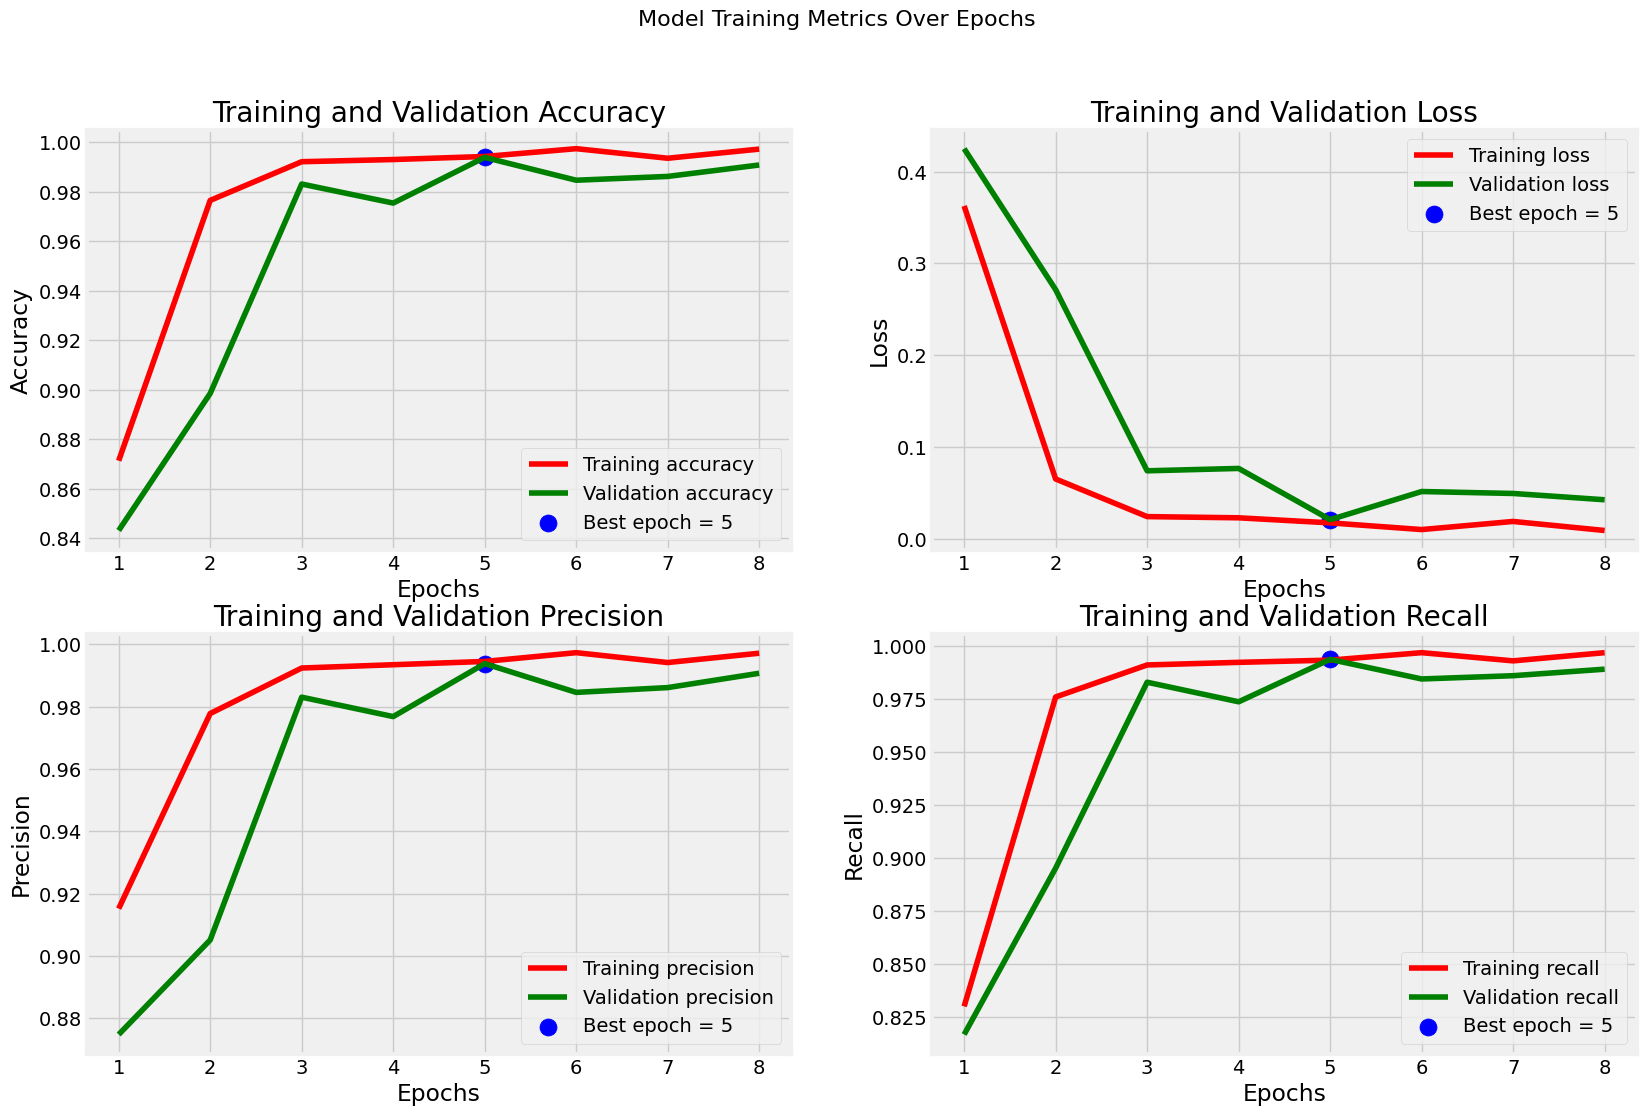

In [20]:
# Get training and validation metrics from history
metrics = ['accuracy', 'loss', 'precision', 'recall']
tr_metrics = {m: hist.history[m] for m in metrics}
val_metrics = {m: hist.history[f'val_{m}'] for m in metrics}

# Find best epochs and values
best_epochs = {}
best_values = {}
for m in metrics:
    if m == 'loss':
        idx = np.argmin(val_metrics[m])
    else:
        idx = np.argmax(val_metrics[m])
    best_epochs[m] = idx + 1
    best_values[m] = val_metrics[m][idx]

# Plot metrics
plt.figure(figsize=(20, 12))
plt.style.use('fivethirtyeight')

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    epochs = range(1, len(tr_metrics[metric]) + 1)

    plt.plot(epochs, tr_metrics[metric], 'r', label=f'Training {metric}')
    plt.plot(epochs, val_metrics[metric], 'g', label=f'Validation {metric}')
    plt.scatter(best_epochs[metric], best_values[metric], s=150, c='blue',
                label=f'Best epoch = {best_epochs[metric]}')

    plt.title(f'Training and Validation {metric.title()}')
    plt.xlabel('Epochs')
    plt.ylabel(metric.title())
    plt.legend()
    plt.grid(True)

plt.suptitle('Model Training Metrics Over Epochs', fontsize=16)
plt.show()

In [21]:
# assess overfit
train_score = model.evaluate(tr_gen, verbose=1) # how well does the model learn?
valid_score = model.evaluate(valid_gen, verbose=1) # how effective is the training process?

# assess performance
test_score = model.evaluate(ts_gen, verbose=1) # how does the model perform on unseen data?

print(f"Train Accuracy: {train_score[1]*100:.2f}%")
print(f"Train Loss: {train_score[0]:.4f}")
print(f"Validation Accuracy: {valid_score[1]*100:.2f}%")
print(f"Validation Loss: {valid_score[0]:.4f}")
print(f"\nTest Accuracy: {test_score[1]*100:.2f}%")
print(f"Test Loss: {test_score[0]:.4f}")

178/178 ━━━━━━━━━━━━━━━━━━━━ 45s 254ms/step - accuracy: 0.9983 - loss: 0.0059 - precision: 0.9983 - recall: 0.9983
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.9939 - loss: 0.0370 - precision: 0.9939 - recall: 0.9939


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 25s 352ms/step - accuracy: 0.9876 - loss: 0.0431 - precision: 0.9893 - recall: 0.9876
Train Accuracy: 99.77%
Train Loss: 0.0092
Validation Accuracy: 99.23%
Validation Loss: 0.0363

Test Accuracy: 98.46%
Test Loss: 0.0499


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step


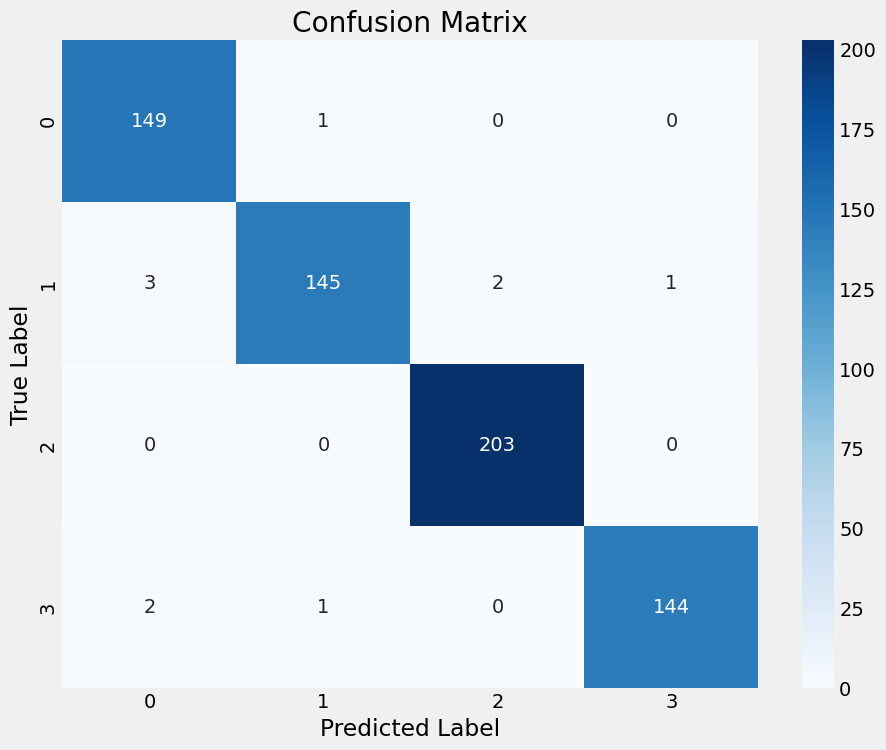

In [22]:
# Make predictions
preds = model.predict(ts_gen)
y_pred = np.argmax(preds, axis=1) # retruns the class with the highest value (probability)

# Define class dictionary
class_dict = {
    0: 'glioma',
    1: 'meningioma',
    2: 'no_tumor',
    3: 'pituitary'
}

# Then create and display the confusion matrix
cm = confusion_matrix(ts_gen.classes, y_pred)
labels = list(class_dict.keys())
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
from PIL import Image

def predict(img_path: str) -> None:
    # Get class labels
    labels = list(class_dict.keys())

    # Create figure
    plt.figure(figsize=(6, 8))

    # Load and preprocess image
    img = Image.open(img_path)
    resized_img = img.resize((299, 299))
    img_array = np.asarray(resized_img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Get model predictions
    predictions = model.predict(img_array)
    probabilities = list(predictions[0])

    # Get predicted class
    predicted_class_idx = np.argmax(probabilities)
    predicted_class = class_dict[predicted_class_idx]

    # Plot original image
    plt.subplot(2, 1, 1)
    plt.imshow(resized_img)
    plt.title(f"Input MRI Image\nPredicted: {predicted_class}")

    # Plot prediction probabilities
    plt.subplot(2, 1, 2)
    bars = plt.barh(labels, probabilities)
    plt.xlabel("Probability", fontsize=15)
    plt.title("Class Probabilities")

    # Add probability labels to bars
    ax = plt.gca()
    ax.bar_label(bars, fmt="%.2f")

    plt.tight_layout()
    plt.show()

    print(f"\nPredicted tumor type: {predicted_class}")

In [24]:
model.save_weights("xception_model.weights.h5")